<a href="https://colab.research.google.com/github/asrianda/GIS/blob/main/lat4/GeoPandas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from geopandas import datasets, read_file, GeoDataFrame

In [3]:
nama='lsm.zip'
kota=gpd.read_file(nama)
kota.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,KDBPUM,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327..."
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845..."
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349..."
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612..."


<Axes: >

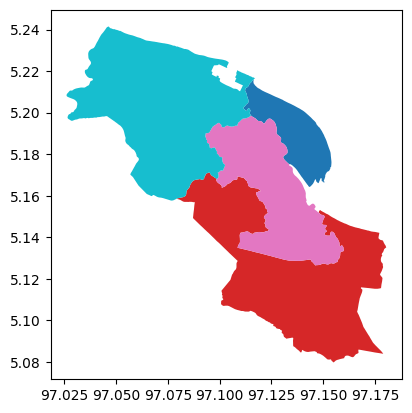

In [4]:
kota.plot(column='NAMOBJ')

In [6]:
import pandas as pd
data=pd.read_excel('penduduk.xlsx')
data.head()

,NAMOBJ,jumlah
0,BANDASAKTI,1200
1,BLANGMANGAT,900
2,MUARA DUA,1000
3,MUARA SATU,850


In [7]:
#-- Mengabungkan file data dan kota --
kota1=kota.merge(data, on='NAMOBJ')

<Axes: >

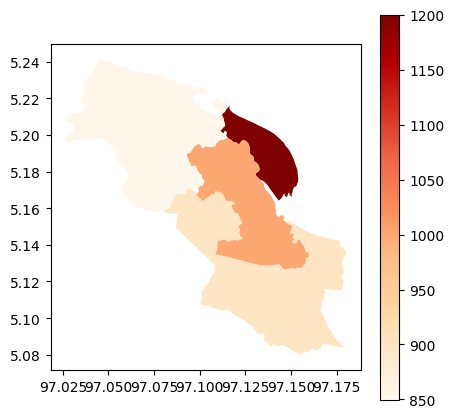

In [12]:
kota1.plot(column='jumlah', cmap='OrRd', figsize=(5,5), legend=True)

<Axes: >

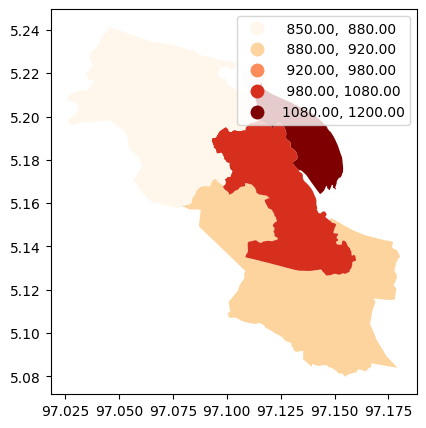

In [15]:
import mapclassify
kota1.plot(column='jumlah', cmap='OrRd', scheme='quantiles', figsize=(5,5), legend=True )

<Axes: >

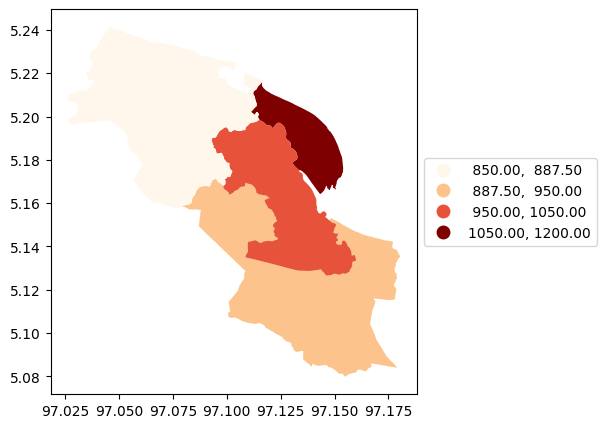

In [16]:
kota1.plot(column='jumlah',cmap='OrRd', scheme='quantiles', figsize=(5,5), legend=True,
           legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)}, k=4)

**Membuat Model Spasial**

In [17]:
#-- Mengkoversi data ke dictionary --
dc_data=data.to_dict()

In [18]:
dc_data

{'NAMOBJ': {0: 'BANDASAKTI',
  1: 'BLANGMANGAT',
  2: 'MUARA DUA',
  3: 'MUARA SATU'},
 'jumlah': {0: 1200, 1: 900, 2: 1000, 3: 850}}

In [40]:
klasifikasi=list()
for i in dc_data['jumlah'].values():
  if i>1000:
    klasifikasi.append('Sangat Tinggi')
  elif i>950:
    klasifikasi.append('Tinggi')
  elif i>=900:
    klasifikasi.append('Sedang')
  else:
    klasifikasi.append('Rendah')


In [41]:
klasifikasi

['Sangat Tinggi', 'Sedang', 'Tinggi', 'Rendah']

In [43]:
geoData=gpd.GeoDataFrame(dc_data)
geoData

,NAMOBJ,jumlah
0,BANDASAKTI,1200
1,BLANGMANGAT,900
2,MUARA DUA,1000
3,MUARA SATU,850


In [44]:
geoData['klasifikasi']=klasifikasi

In [45]:
geoData

,NAMOBJ,jumlah,klasifikasi
0,BANDASAKTI,1200,Sangat Tinggi
1,BLANGMANGAT,900,Sedang
2,MUARA DUA,1000,Tinggi
3,MUARA SATU,850,Rendah


In [50]:
kota2=kota.merge(geoData, on='NAMOBJ')

<Axes: >

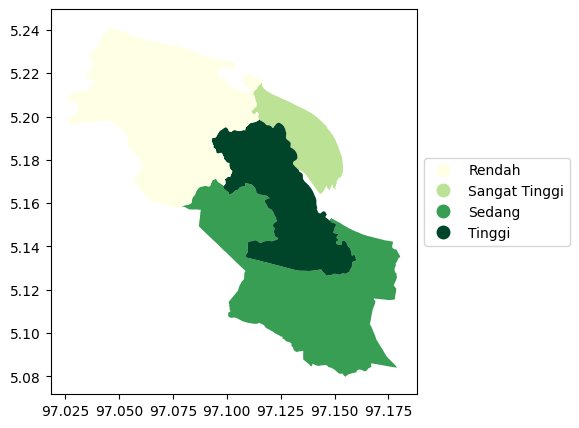

In [56]:
kota2.plot(column='klasifikasi', cmap='YlGn', figsize=(5,5), legend=True,
           legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)})

In [57]:
kota2.to_file("jumlah.shp")

<ipython-input-57-37714a929ca9>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  kota2.to_file("jumlah.shp")
